## 直接利用下面参考资料提供的数据和思路
https://blog.csdn.net/myjiayan/article/details/45954679

所有线路的字典如下：

In [58]:
complete_lines = {"line1": u'''苹果园 古城路 八角游乐园 八宝山 玉泉路 五棵松 万寿路 公主坟 军事博物馆 木樨地 南礼士路 复兴门 西单 天安门西 天安门东 王府井 东单 建国门 永安里 国贸 大望路 四惠 四惠东''',
"line2": u'''西直门 车公庄 阜成门 复兴门 长椿街 宣武门 和平门 前门 崇文门 北京站 建国门 朝阳门 东四十条 东直门 雍和宫 安定门 鼓楼大街 积水潭''',
"line5": u'''宋家庄 刘家窑 蒲黄榆 天坛东门 磁器口 崇文门 东单 灯市口 东四 张自忠路 北新桥 雍和宫 和平里北街 和平西桥 惠新西街南口 惠新西街北口 大屯桥东 北苑路北 立水桥南 立水桥 天通苑南 天通苑 天通苑北''',
"line4": u'''天宫院 生物医药基地 义和庄 黄村火车站 黄村西大街 清源路 枣园 高米店南 高米店北 西红门 新宫 公益西桥 角门西 马家堡 北京南站 陶然亭 菜市口 宣武门 西单 灵境胡同 西四 平安里 新街口 西直门 动物园 国家图书馆 魏公村 人民大学 海淀黄庄 中关村 北京大学东门 圆明园 西苑 北宫门 安河桥北''',
"line6": u'''海淀五路居 慈寿寺 白石桥南 车公庄西 车公庄 平安里 北海北 南锣鼓巷 东四 朝阳门 东大桥 呼家楼 金台路 十里堡 青年路 褡裢坡 黄渠 常营 草房 物资学院路 通州北关 通运门 北运河西 北运河东 郝家府 东夏园 潞城''',
"line8": u'''朱辛庄 育知路 平西府 回龙观东大街 霍营 育新 西小口 永泰庄 林萃桥 森林公园南门 奥林匹克公园 奥体中心 北土城 安华桥 鼓楼大街 什刹海 南锣鼓巷''',
"line9": u'''国家图书馆 白石桥南 白堆子 军事博物馆 北京西站 六里桥东 六里桥 七里庄 丰台东大街 丰台南路 科怡路 丰台科技园 郭公庄''',
"line10": u'''劲松 双井 国贸 金台夕照 呼家楼 团结湖 农业展览馆 亮马桥 三元桥 太阳宫 芍药居 惠新西街南口 安贞门 北土城 健德门 牡丹园 西土城 知春路 知春里 海淀黄庄 苏州街 巴沟 火器营 长春桥 车道沟 慈寿寺 西钓鱼台 公主坟 莲花桥 六里桥 西局 泥洼 丰台站 首经贸 纪家庙 草桥 角门西 角门东 大红门 石榴庄 宋家庄 成寿寺 分钟寺 十里河 潘家园''',
"line13": u'''西直门 大钟寺 知春路 五道口 上地 西二旗 龙泽 回龙观 霍营 立水桥 北苑 望京西 芍药居 光熙门 柳芳 东直门''',
"line14": u'''张郭庄 园博园 大瓦窑 郭庄子 打井 七里庄 西局''',
"line15": u'''俸伯 顺义 石门 南法信 后沙峪 花梨坎 国展 孙河 马泉营 崔各庄望京 望京西''',
"YiZhuangLine": u'''宋家庄 肖村 小红门 旧宫 亦庄桥 亦庄文化园 万源街 荣京东街 荣昌东街 同济南路 经海路 次渠南 次渠''',
"FangShanLine": u'''郭公庄 大葆台 稻田 长阳 篱笆房 广阳城 良乡大学城北 良乡大学城 良乡大学城西 良乡南关 苏庄''',
"ChangPingLine": u'''西二旗 生命科学园 朱辛庄 巩华城 沙河 沙河高教园 南邵''',
"BaTongLine": u'''四惠 四惠东 高碑店 中国传媒大学 双桥 管庄 八里桥 通州北苑 果园 九棵树 梨园 临河里 土桥''',
                 }

In [59]:
def build_subway(lines):
    # 对于def func(**args):，**args表示把参数作为字典的健-值对存储在dict（字典）args里面。
    # 例如，调用 func(a='I', b='am', c='wcdj') ，args就表示{'a':'I', 'b':'am', 'c':'wcdj'}
    """
    Input is build_subway(linename = 'station1 station2...'...)
    Ouput is a dictionary like {station:{neighbor1:line number,neighbor2:line number,...},station2:{...},...}
    """
    # 现在输入可以看成是这样：line14: '''张郭庄 园博园 大瓦窑 郭庄子 打井 七里庄 西局'''
    # 
    for key in lines.keys():
        value = lines[key]
        lines[key] = value.split()
        
    # 这里 line14: ['张郭庄', '园博园', '大瓦窑', '郭庄子', '打井', '七里庄', '西局']
    
    stations = set()
    
    for key in lines.keys():
        stations.update(set(lines[key]))
        
    # 这里就把 lines 的键值取出来作为车站，最终得到所有车站的集合。
    
    system = {}
    
    # 如果某一站在某一个线路的值中，那么就看它在值中的位置，把它临站台作为键，线路作为值，得到线路字典。
    for station in stations:
        next_station = {}
        for key in lines:
            if station in lines[key]:
                line = lines[key]
                idx = line.index(station)
                if idx == 0:
                    next_station[line[1]] = key
                elif idx == len(line) - 1:
                    next_station[line[idx - 1]] = key
                else:
                    next_station[line[idx - 1]] = key
                    next_station[line[idx + 1]] = key
        system[station] = next_station
    return system

效果如下：

In [60]:
bj_subway = build_subway(complete_lines)

In [61]:
print(bj_subway)

{'四惠': {'大望路': 'line1', '四惠东': 'BaTongLine'}, '高碑店': {'四惠东': 'BaTongLine', '中国传媒大学': 'BaTongLine'}, '顺义': {'俸伯': 'line15', '石门': 'line15'}, '良乡大学城西': {'良乡大学城': 'FangShanLine', '良乡南关': 'FangShanLine'}, '长椿街': {'复兴门': 'line2', '宣武门': 'line2'}, '和平门': {'宣武门': 'line2', '前门': 'line2'}, '磁器口': {'天坛东门': 'line5', '崇文门': 'line5'}, '宣武门': {'长椿街': 'line2', '和平门': 'line2', '菜市口': 'line4', '西单': 'line4'}, '古城路': {'苹果园': 'line1', '八角游乐园': 'line1'}, '西四': {'灵境胡同': 'line4', '平安里': 'line4'}, '东夏园': {'郝家府': 'line6', '潞城': 'line6'}, '马泉营': {'孙河': 'line15', '崔各庄望京': 'line15'}, '八里桥': {'管庄': 'BaTongLine', '通州北苑': 'BaTongLine'}, '永泰庄': {'西小口': 'line8', '林萃桥': 'line8'}, '莲花桥': {'公主坟': 'line10', '六里桥': 'line10'}, '知春里': {'知春路': 'line10', '海淀黄庄': 'line10'}, '崔各庄望京': {'马泉营': 'line15', '望京西': 'line15'}, '小红门': {'肖村': 'YiZhuangLine', '旧宫': 'YiZhuangLine'}, '三元桥': {'亮马桥': 'line10', '太阳宫': 'line10'}, '梨园': {'九棵树': 'BaTongLine', '临河里': 'BaTongLine'}, '成寿寺': {'宋家庄': 'line10', '分钟寺': 'line10'}, '白堆子': {'白石桥南': 'line9'

注意到，北京地铁 2号线和 10号线是环线，需要额外的对待：

In [62]:
def update_subway(BeiJingSubway):
    """
    due to line2 and line10 are circle lines.
    the BeiJingSubway need to update
    """
    BeiJingSubway[u'西直门'][u'积水潭'] = 'line2'
    BeiJingSubway[u'积水潭'][u'西直门'] = 'line2'
    BeiJingSubway[u'劲松'][u'潘家园'] = 'line10'
    BeiJingSubway[u'潘家园'][u'劲松'] = 'line10'
    return BeiJingSubway

In [63]:
bj_subway = update_subway(bj_subway)

In [74]:
print(bj_subway)

{'四惠': {'大望路': 'line1', '四惠东': 'BaTongLine'}, '高碑店': {'四惠东': 'BaTongLine', '中国传媒大学': 'BaTongLine'}, '顺义': {'俸伯': 'line15', '石门': 'line15'}, '良乡大学城西': {'良乡大学城': 'FangShanLine', '良乡南关': 'FangShanLine'}, '长椿街': {'复兴门': 'line2', '宣武门': 'line2'}, '和平门': {'宣武门': 'line2', '前门': 'line2'}, '磁器口': {'天坛东门': 'line5', '崇文门': 'line5'}, '宣武门': {'长椿街': 'line2', '和平门': 'line2', '菜市口': 'line4', '西单': 'line4'}, '古城路': {'苹果园': 'line1', '八角游乐园': 'line1'}, '西四': {'灵境胡同': 'line4', '平安里': 'line4'}, '东夏园': {'郝家府': 'line6', '潞城': 'line6'}, '马泉营': {'孙河': 'line15', '崔各庄望京': 'line15'}, '八里桥': {'管庄': 'BaTongLine', '通州北苑': 'BaTongLine'}, '永泰庄': {'西小口': 'line8', '林萃桥': 'line8'}, '莲花桥': {'公主坟': 'line10', '六里桥': 'line10'}, '知春里': {'知春路': 'line10', '海淀黄庄': 'line10'}, '崔各庄望京': {'马泉营': 'line15', '望京西': 'line15'}, '小红门': {'肖村': 'YiZhuangLine', '旧宫': 'YiZhuangLine'}, '三元桥': {'亮马桥': 'line10', '太阳宫': 'line10'}, '梨园': {'九棵树': 'BaTongLine', '临河里': 'BaTongLine'}, '成寿寺': {'宋家庄': 'line10', '分钟寺': 'line10'}, '白堆子': {'白石桥南': 'line9'

利用 BFS 给出的答案方案。

In [65]:
def shorter_path(start, goal):
    """
    without consideration of the change times fina shortest path
    """
    if start == goal:
        return [start]
    explored = set() 
    queue = [ [start] ] 
    while queue:
        path = queue.pop(0)
        s = path[-1]
        for state, action in bj_subway[s].items():
            if state not in explored:
                explored.add(state)
                path2 = path + [action, state]
                if state == goal:
                    return path2
                else:
                    queue.append(path2)
    return []

In [66]:
shorter_path("人民大学","青年路")

['人民大学',
 'line4',
 '魏公村',
 'line4',
 '国家图书馆',
 'line4',
 '动物园',
 'line4',
 '西直门',
 'line2',
 '车公庄',
 'line6',
 '平安里',
 'line6',
 '北海北',
 'line6',
 '南锣鼓巷',
 'line6',
 '东四',
 'line6',
 '朝阳门',
 'line6',
 '东大桥',
 'line6',
 '呼家楼',
 'line6',
 '金台路',
 'line6',
 '十里堡',
 'line6',
 '青年路']

![Renmindaxue-qingnianlu](./Renmindaxue-qingnianlu.jpg)
从图中我们可以看出我们没有必要从“西直门”转车到“车公庄”，而应该直接到“平安里”。也就是要有换乘次数的考虑。我们这里给出的方案是第三个方案：
![Renmindaxue-qingnianlu-ways](./Renmindaxue-qingnianlu-ways.jpg)

In [85]:
def path_search(start, goal):
    """Find the shortest path from start state to a state
    with min change times such that is_goal(state) is true."""
    if start == goal:
        return [start]
    explored = set() 
    queue = [[start, ('', 0)]]
    while queue:
        path = queue.pop(0)
        s = path[-2]
        linenum, changetimes = path[-1]
        if s == goal:
            return path
        for state, action in bj_subway[s].items():
            if state not in explored:
                linechange = changetimes
                explored.add(state)
                if linenum != action:
                    linechange += 1
                path2 = path[:-1] + [action, state, (action, linechange)]
                queue.append(path2)
                queue.sort(key = lambda path:path[-1][-1])
    return []

In [68]:
path_search("人民大学","青年路")

['人民大学',
 'line4',
 '魏公村',
 'line4',
 '国家图书馆',
 'line4',
 '动物园',
 'line4',
 '西直门',
 'line4',
 '新街口',
 'line4',
 '平安里',
 'line6',
 '北海北',
 'line6',
 '南锣鼓巷',
 'line6',
 '东四',
 'line6',
 '朝阳门',
 'line6',
 '东大桥',
 'line6',
 '呼家楼',
 'line6',
 '金台路',
 'line6',
 '十里堡',
 'line6',
 '青年路',
 ('line6', 2)]

In [69]:
def find_path(here, there, system = bj_subway):
    """
    Return a path on the subway system from here to there.
    find a better path between the change-time-less path and shorter path
    """

    min_change_path = path_search(here, there)[::2]
    short_path = shorter_path(here, there)[::2]
    if len(min_change_path) <= len(short_path):
        for ele in min_change_path:
            print(ele)
        print(len(min_change_path))
    else:
        for ele in short_path:
            print(ele)
        print(len(short_path))

In [70]:
find_path("西钓鱼台","团结湖")

西钓鱼台
慈寿寺
白石桥南
车公庄西
车公庄
平安里
北海北
南锣鼓巷
东四
朝阳门
东大桥
呼家楼
团结湖
13


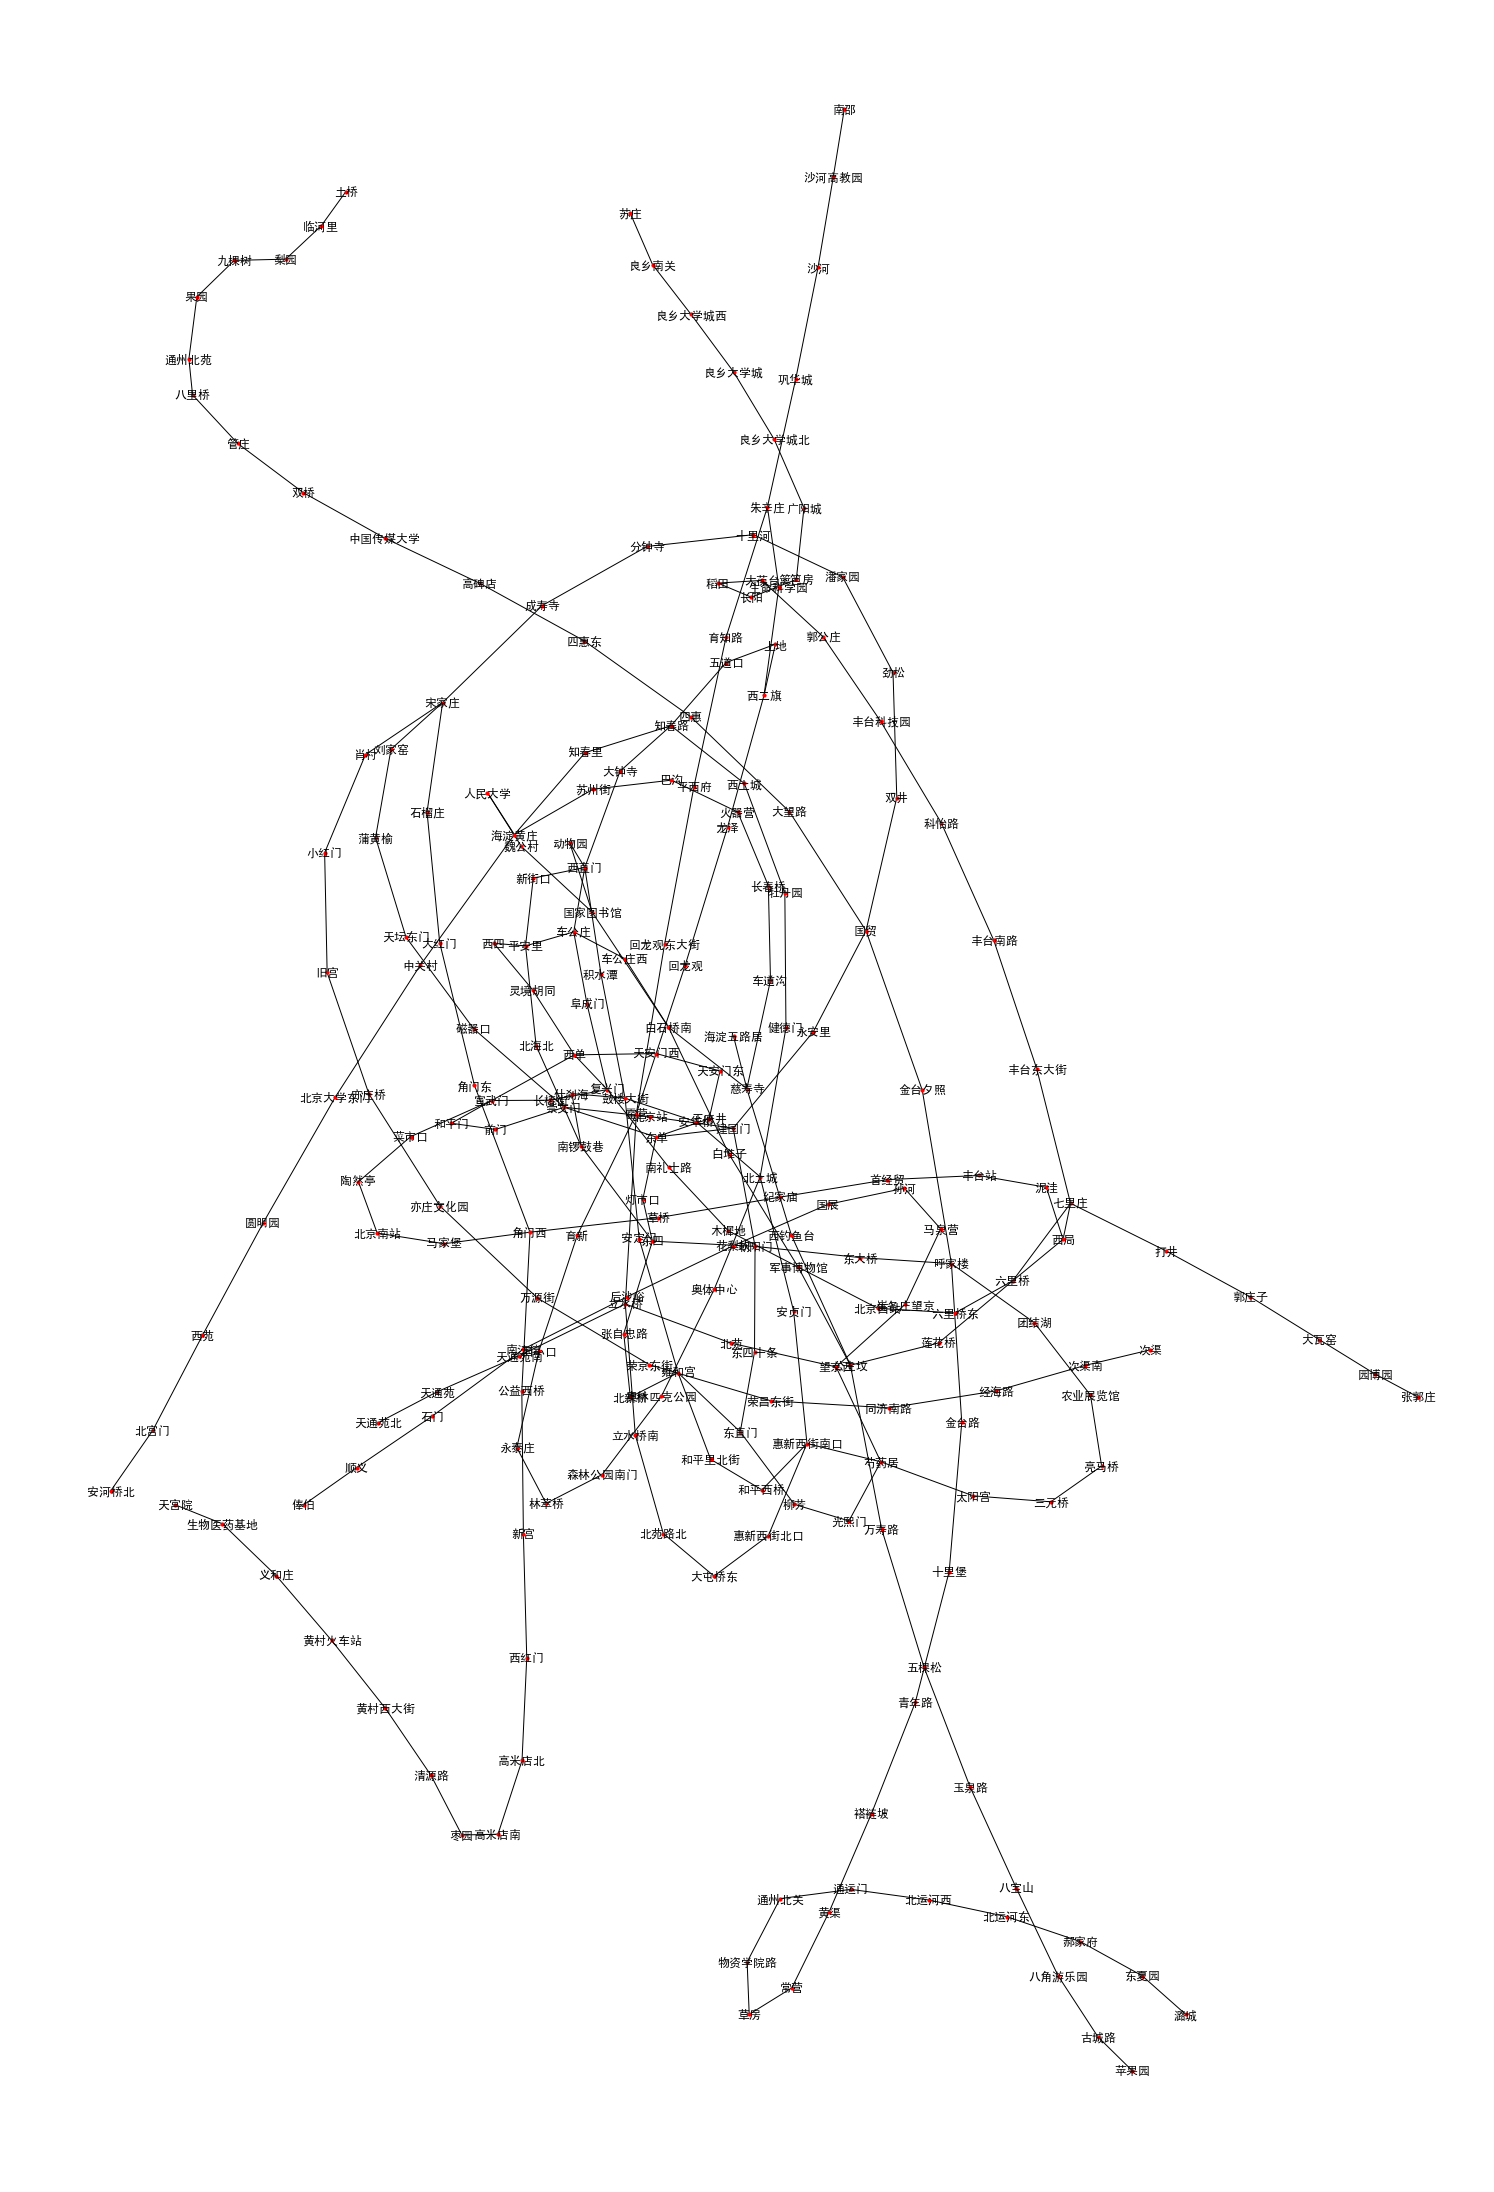

In [131]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
stations_connection = defaultdict(list)

for sta in bj_subway.keys():
    stations_connection[sta] = list(bj_subway[sta].keys())

stations_connection_graph = nx.Graph(stations_connection)

# 这句话确定图的大小
plt.figure(1,figsize=(20,30)) 
nx.draw(stations_connection_graph, with_labels = True, node_size = 10)
plt.show()

Mathematica 可以实现如下的，利用我们的可以实现如下的效果吗？

![mma](./mma.jpg)